In [1]:
from __future__ import print_function

import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from keras.utils import to_categorical

In [2]:
from google.colab import files

uploaded = files.upload()

Saving cancer dataset.csv to cancer dataset.csv


In [3]:
cancer_data = pd.read_csv('cancer dataset.csv', sep =';')

In [4]:
cancer_data.head()

,clump,ucellsize,ucellshape,mgadhesion,sepics,bnuclei,bchromatin,normnucl,mitoses,classe
0,4,1,1,1,2,3,1,1,1,begnin
1,1,5,8,6,5,8,7,10,1,malignant
2,3,2,2,3,2,1,1,1,1,begnin
3,3,1,1,3,8,1,5,8,1,begnin
4,10,4,6,1,2,10,5,3,1,malignant


In [5]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   clump       300 non-null    int64 
 1   ucellsize   300 non-null    int64 
 2   ucellshape  300 non-null    int64 
 3   mgadhesion  300 non-null    int64 
 4   sepics      300 non-null    int64 
 5   bnuclei     300 non-null    int64 
 6   bchromatin  300 non-null    int64 
 7   normnucl    300 non-null    int64 
 8   mitoses     300 non-null    int64 
 9   classe      300 non-null    object
dtypes: int64(9), object(1)
memory usage: 23.6+ KB


In [6]:
cancer_data.shape

(300, 10)

In [7]:
X = cancer_data[['clump',	'ucellsize',	'ucellshape',	'mgadhesion',	'sepics',	'bnuclei',	'bchromatin',	'normnucl',	'mitoses']]
y = cancer_data['classe']

In [12]:
X.shape

(300, 9)

In [8]:
# encode class values as integers
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
Y = to_categorical(encoded_Y)

In [9]:
Y

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [11]:
#Splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state=0)

X_model, X_val, y_model, y_val = train_test_split(X_train, y_train, test_size = 0.2)

In [13]:
##Build the neural network

model = Sequential([
    Dense(81, input_dim= 9, activation = 'relu'),
    Dense(2, activation= 'softmax')]) 

In [17]:
#compiling

model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_model, y_model, validation_data=(X_val, y_val), epochs=20, batch_size=25)

Epoch 1/20
8/8 [==============================] - 1s 28ms/step - loss: 0.0269 - accuracy: 1.0000 - val_loss: 0.1488 - val_accuracy: 0.9792
Epoch 2/20
8/8 [==============================] - 0s 7ms/step - loss: 0.0257 - accuracy: 0.9896 - val_loss: 0.1308 - val_accuracy: 0.9792
Epoch 3/20
8/8 [==============================] - 0s 8ms/step - loss: 0.0243 - accuracy: 1.0000 - val_loss: 0.1246 - val_accuracy: 0.9792
Epoch 4/20
8/8 [==============================] - 0s 7ms/step - loss: 0.0236 - accuracy: 0.9896 - val_loss: 0.1345 - val_accuracy: 0.9792
Epoch 5/20
8/8 [==============================] - 0s 9ms/step - loss: 0.0227 - accuracy: 0.9948 - val_loss: 0.1276 - val_accuracy: 0.9792
Epoch 6/20
8/8 [==============================] - 0s 7ms/step - loss: 0.0222 - accuracy: 1.0000 - val_loss: 0.1334 - val_accuracy: 0.9792
Epoch 7/20
8/8 [==============================] - 0s 10ms/step - loss: 0.0226 - accuracy: 0.9896 - val_loss: 0.1291 - val_accuracy: 0.9792
Epoch 8/20
8/8 [================

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 81)                810       
                                                                 
 dense_1 (Dense)             (None, 2)                 164       
                                                                 
Total params: 974
Trainable params: 974
Non-trainable params: 0
_________________________________________________________________


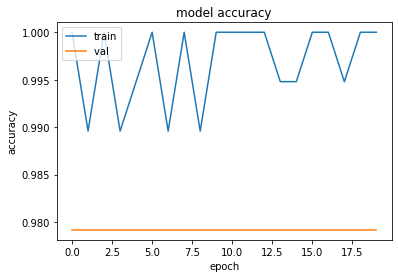

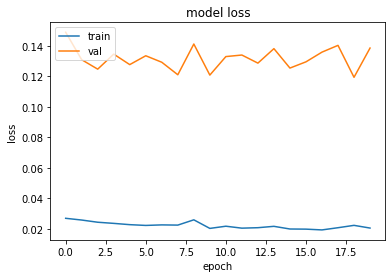

In [19]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val '], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [20]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [21]:
y_pred

array([[9.9995708e-01, 4.2854772e-05],
       [9.9999857e-01, 1.4641412e-06],
       [3.6643890e-01, 6.3356113e-01],
       [4.0467828e-08, 1.0000000e+00],
       [2.3980886e-07, 9.9999976e-01],
       [9.9999714e-01, 2.8434281e-06],
       [9.9999881e-01, 1.1711288e-06],
       [2.9717743e-05, 9.9997032e-01],
       [9.9990690e-01, 9.3052353e-05],
       [9.9998748e-01, 1.2492053e-05],
       [9.9998415e-01, 1.5833637e-05],
       [9.9999881e-01, 1.2170382e-06],
       [3.6329606e-05, 9.9996364e-01],
       [9.9999654e-01, 3.4420393e-06],
       [9.9999905e-01, 9.5182168e-07],
       [1.2212810e-10, 1.0000000e+00],
       [9.9999881e-01, 1.2470715e-06],
       [7.5867794e-02, 9.2413223e-01],
       [9.7828662e-01, 2.1713378e-02],
       [2.7311172e-02, 9.7268885e-01],
       [9.9999118e-01, 8.8450824e-06],
       [9.9993992e-01, 6.0078579e-05],
       [6.1274052e-14, 1.0000000e+00],
       [9.9999893e-01, 1.0354711e-06],
       [9.9999881e-01, 1.2470715e-06],
       [9.9999857e-01, 1.

In [22]:
from sklearn.metrics import accuracy_score
import numpy as np

pred = []

for i in range(len(y_pred)):
  pred.append(np.argmax(y_pred[i]))

test = []

for i in range(len(y_test)):
  test.append(np.argmax(y_test[i]))

print(f'The accuracy on test data is {accuracy_score(pred,test)}')

The accuracy on test data is 0.9833333333333333
